In [103]:
import tensorflow as tf
print(tf.__version__)

2.11.0


In [104]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import Sequential
from tensorflow.keras.layers import *
from keras.layers import Input, Lambda, Dense, Flatten,Dropout,BatchNormalization
from keras.models import *
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import keras
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import rasterio
from keras.layers import Conv2D,MaxPooling2D,Activation,Dropout,Flatten,Dense
from keras.preprocessing.image import ImageDataGenerator
from glob import glob
import sys
import PIL
from PIL import Image

In [105]:
p_exe1a="/home/avni/Desktop/gp/dataset/EXE-1a_m4/EXE-1a_m4/all/train/"
p_ros6="/home/avni/Desktop/gp/dataset/ROS-6_m3/ROS-6_m3/all/train/"
p_ros9="/home/avni/Desktop/gp/dataset/ROS-9_m4/ROS-9_m4/all/train/"
p_ros12="/home/avni/Desktop/gp/dataset/ROS-12_m4/ROS-12_m4/all/train/"
p_ros13="/home/avni/Desktop/gp/dataset/ROS-13_m3/ROS-13_m3/all/train/"
p_ros23="/home/avni/Desktop/gp/dataset/ROS-23_m2/ROS-23_m2/all/train/"

In [106]:
p_exe1a_test="/home/avni/Desktop/gp/dataset/EXE-1a_m4/EXE-1a_m4/all/test/"
p_ros6_test="/home/avni/Desktop/gp/dataset/ROS-6_m3/ROS-6_m3/all/test/"
p_ros9_test="/home/avni/Desktop/gp/dataset/ROS-9_m4/ROS-9_m4/all/test/"
p_ros12_test="/home/avni/Desktop/gp/dataset/ROS-12_m4/ROS-12_m4/all/test/"
p_ros13_test="/home/avni/Desktop/gp/dataset/ROS-13_m3/ROS-13_m3/all/test/"
p_ros23_test="/home/avni/Desktop/gp/dataset/ROS-23_m2/ROS-23_m2/all/test/"

In [107]:
train_path="/home/avni/Desktop/gp/wspace/ch4/train/"
test_path="/home/avni/Desktop/gp/wspace/ch4/test/"

In [108]:
exe1a_ch4, exe1a_ch5, exe1a_ch6 = ([] for i in range(3))
ros6_ch4, ros6_ch5, ros6_ch6 = ([] for i in range(3))
ros9_ch4, ros9_ch5, ros9_ch6 = ([] for i in range(3))
ros12_ch4, ros12_ch5, ros12_ch6 = ([] for i in range(3))
ros13_ch4, ros13_ch5, ros13_ch6 = ([] for i in range(3))
ros23_ch4, ros23_ch5, ros23_ch6 = ([] for i in range(3))

In [109]:
exe1a_ch4_test, exe1a_ch5_test, exe1a_ch6_test = ([] for i in range(3))
ros6_ch4_test, ros6_ch5_test, ros6_ch6_test = ([] for i in range(3))
ros9_ch4_test, ros9_ch5_test, ros9_ch6_test = ([] for i in range(3))
ros12_ch4_test, ros12_ch5_test, ros12_ch6_test = ([] for i in range(3))
ros13_ch4_test, ros13_ch5_test, ros13_ch6_test = ([] for i in range(3))
ros23_ch4_test, ros23_ch5_test, ros23_ch6_test = ([] for i in range(3))

In [110]:
exe1a_ch4_rgb, exe1a_ch5_rgb, exe1a_ch6_rgb = ([] for i in range(3))
ros6_ch4_rgb, ros6_ch5_rgb, ros6_ch6_rgb = ([] for i in range(3))
ros9_ch4_rgb, ros9_ch5_rgb, ros9_ch6_rgb = ([] for i in range(3))
ros12_ch4_rgb, ros12_ch5_rgb, ros12_ch6_rgb = ([] for i in range(3))
ros13_ch4_rgb, ros13_ch5_rgb, ros13_ch6_rgb = ([] for i in range(3))
ros23_ch4_rgb, ros23_ch5_rgb, ros23_ch6_rgb = ([] for i in range(3))

In [111]:
exe1a_ch4_rgb_test, exe1a_ch5_rgb_test, exe1a_ch6_rgb_test = ([] for i in range(3))
ros6_ch4_rgb_test, ros6_ch5_rgb_test, ros6_ch6_rgb_test = ([] for i in range(3))
ros9_ch4_rgb_test, ros9_ch5_rgb_test, ros9_ch6_rgb_test = ([] for i in range(3))
ros12_ch4_rgb_test, ros12_ch5_rgb_test, ros12_ch6_rgb_test = ([] for i in range(3))
ros13_ch4_rgb_test, ros13_ch5_rgb_test, ros13_ch6_rgb_test = ([] for i in range(3))
ros23_ch4_rgb_test, ros23_ch5_rgb_test, ros23_ch6_rgb_test = ([] for i in range(3))

In [112]:
#data will be stored as numpy array
def store_data(path,ch4,ch5,ch6):
    for file in sorted(os.listdir(path),reverse=True):
        image_path=path+file
        img=rasterio.open(image_path)
        img_arr=img.read(1)
        img_arr=cv2.resize(img_arr,(32,64))
        if 'Ch4' in file:
            ch4.append(img_arr)
        if 'Ch5' in file:
            ch5.append(img_arr)
        if 'Ch6' in file:
            ch6.append(img_arr)
        img.close()

    ch4 = np.array(ch4)
    ch5 = np.array(ch5)
    ch6 = np.array(ch6)


In [113]:
#data will be converted to rgb images
def rgb_converter(path,ch4,ch5,ch6,rgb4,rgb5,rgb6):
    for img in ch4:
        norm = cv2.normalize(img, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
        norm = cv2.cvtColor(norm, cv2.COLOR_GRAY2RGB)
        rgb4.append(norm)
    for img in ch5:
        norm = cv2.normalize(img, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
        norm = cv2.cvtColor(norm, cv2.COLOR_GRAY2RGB)
        rgb5.append(norm)
    for img in ch6:
        norm = cv2.normalize(img, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
        norm = cv2.cvtColor(norm, cv2.COLOR_GRAY2RGB)
        rgb6.append(norm)

    rgb4=np.array(rgb4)
    rgb5=np.array(rgb5)
    rgb6=np.array(rgb6)


In [114]:
store_data(p_exe1a,exe1a_ch4,exe1a_ch5,exe1a_ch6)
rgb_converter(p_exe1a,exe1a_ch4,exe1a_ch5,exe1a_ch6,exe1a_ch4_rgb,exe1a_ch5_rgb,exe1a_ch6_rgb)

store_data(p_ros6,ros6_ch4,ros6_ch5,ros6_ch6)
rgb_converter(p_ros6,ros6_ch4,ros6_ch5,ros6_ch6,ros6_ch4_rgb,ros6_ch5_rgb,ros6_ch6_rgb)

store_data(p_ros9,ros9_ch4,ros9_ch5,ros9_ch6)
rgb_converter(p_ros9,ros9_ch4,ros9_ch5,ros9_ch6,ros9_ch4_rgb,ros9_ch5_rgb,ros9_ch6_rgb)

store_data(p_ros12,ros12_ch4,ros12_ch5,ros12_ch6)
rgb_converter(p_ros12,ros12_ch4,ros12_ch5,ros12_ch6,ros12_ch4_rgb,ros12_ch5_rgb,ros12_ch6_rgb)

store_data(p_ros13,ros13_ch4,ros13_ch5,ros13_ch6)
rgb_converter(p_ros13,ros13_ch4,ros13_ch5,ros13_ch6,ros13_ch4_rgb,ros13_ch5_rgb,ros13_ch6_rgb)

store_data(p_ros23,ros23_ch4,ros23_ch5,ros23_ch6)
rgb_converter(p_ros23,ros23_ch4,ros23_ch5,ros23_ch6,ros23_ch4_rgb,ros23_ch5_rgb,ros23_ch6_rgb)

In [115]:
store_data(p_exe1a_test,exe1a_ch4_test,exe1a_ch5_test,exe1a_ch6_test)
rgb_converter(p_exe1a_test,exe1a_ch4_test,exe1a_ch5_test,exe1a_ch6_test,exe1a_ch4_rgb_test,exe1a_ch5_rgb_test,exe1a_ch6_rgb_test)

store_data(p_ros6_test,ros6_ch4_test,ros6_ch5_test,ros6_ch6_test)
rgb_converter(p_ros6_test,ros6_ch4_test,ros6_ch5_test,ros6_ch6_test,ros6_ch4_rgb_test,ros6_ch5_rgb_test,ros6_ch6_rgb_test)

store_data(p_ros9_test,ros9_ch4_test,ros9_ch5_test,ros9_ch6_test)
rgb_converter(p_ros9_test,ros9_ch4_test,ros9_ch5_test,ros9_ch6_test,ros9_ch4_rgb_test,ros9_ch5_rgb_test,ros9_ch6_rgb_test)

store_data(p_ros12_test,ros12_ch4_test,ros12_ch5_test,ros12_ch6_test)
rgb_converter(p_ros12_test,ros12_ch4_test,ros12_ch5_test,ros12_ch6_test,ros12_ch4_rgb_test,ros12_ch5_rgb_test,ros12_ch6_rgb_test)

store_data(p_ros13_test,ros13_ch4_test,ros13_ch5_test,ros13_ch6_test)
rgb_converter(p_ros13_test,ros13_ch4_test,ros13_ch5_test,ros13_ch6_test,ros13_ch4_rgb_test,ros13_ch5_rgb_test,ros13_ch6_rgb_test)

store_data(p_ros23_test,ros23_ch4_test,ros23_ch5_test,ros23_ch6_test)
rgb_converter(p_ros23_test,ros23_ch4_test,ros23_ch5_test,ros23_ch6_test,ros23_ch4_rgb_test,ros23_ch5_rgb_test,ros23_ch6_rgb_test)

(64, 32, 3) uint8
0 255


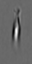

In [116]:
norm=exe1a_ch4_rgb[110]
print(norm.shape, norm.dtype)
print(np.amin(norm),np.amax(norm))
import PIL
PIL.Image.fromarray(norm)


In [117]:
TRAIN=[exe1a_ch4_rgb,ros6_ch4_rgb, ros9_ch4_rgb,ros12_ch4_rgb,ros13_ch4_rgb,ros23_ch4_rgb]
x_train=[]
for cellType in TRAIN:
    for img in cellType:
        x_train.append(img)
x_train=np.array(x_train)
print(len(exe1a_ch4_rgb))
print(len(ros6_ch4_rgb))
print(len(ros9_ch4_rgb))
print(len(ros12_ch4_rgb))
print(len(ros13_ch4_rgb))
print(len(ros23_ch4_rgb))

PIL.Image.fromarray(x_train[5141])
print(x_train[1])

2573
2568
2569
2570
2500
2502
[[[95 95 95]
  [93 93 93]
  [93 93 93]
  ...
  [98 98 98]
  [97 97 97]
  [96 96 96]]

 [[94 94 94]
  [94 94 94]
  [95 95 95]
  ...
  [98 98 98]
  [98 98 98]
  [97 97 97]]

 [[95 95 95]
  [96 96 96]
  [97 97 97]
  ...
  [95 95 95]
  [96 96 96]
  [96 96 96]]

 ...

 [[98 98 98]
  [98 98 98]
  [96 96 96]
  ...
  [95 95 95]
  [96 96 96]
  [95 95 95]]

 [[96 96 96]
  [96 96 96]
  [95 95 95]
  ...
  [93 93 93]
  [94 94 94]
  [93 93 93]]

 [[97 97 97]
  [97 97 97]
  [93 93 93]
  ...
  [95 95 95]
  [95 95 95]
  [93 93 93]]]


In [119]:
from PIL import Image
a=0
for img in x_train[0:2573]:
    jpg = Image.fromarray(img, "RGB")
    jpg.save(f"/home/avni/Desktop/ch4_jpg/ch4/train/EXE-1a_m4/{a}.jpg")   
    a+=1

In [120]:
from PIL import Image
a=0
for img in x_train[2573:5141]:
    jpg = Image.fromarray(img, "RGB")
    jpg.save(f"/home/avni/Desktop/ch4_jpg/ch4/train/ROS-6_m3/{a}.jpg")   
    a+=1

In [121]:
from PIL import Image
a=0
for img in x_train[5141:7710]:
    jpg = Image.fromarray(img, "RGB")
    jpg.save(f"/home/avni/Desktop/ch4_jpg/ch4/train/ROS-9_m4/{a}.jpg")   
    a+=1

In [122]:
from PIL import Image
a=0
for img in x_train[7710:10280]:
    jpg = Image.fromarray(img, "RGB")
    jpg.save(f"/home/avni/Desktop/ch4_jpg/ch4/train/ROS-12_m4/{a}.jpg")   
    a+=1

In [123]:
from PIL import Image
a=0
for img in x_train[10280:12780]:
    jpg = Image.fromarray(img, "RGB")
    jpg.save(f"/home/avni/Desktop/ch4_jpg/ch4/train/ROS-13_m3/{a}.jpg")   
    a+=1

In [124]:
from PIL import Image
a=0
for img in x_train[12780:15282]:
    jpg = Image.fromarray(img, "RGB")
    jpg.save(f"/home/avni/Desktop/ch4_jpg/ch4/train/ROS-23_m2/{a}.jpg")   
    a+=1

750
750
750
750
750
750


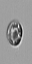

In [125]:
TEST=[exe1a_ch4_rgb_test,ros6_ch4_rgb_test, ros9_ch4_rgb_test,ros12_ch4_rgb_test,ros13_ch4_rgb_test,ros23_ch4_rgb_test]
x_test=[]
for cellType in TEST:
    for img in cellType:
        x_test.append(img)
x_test=np.array(x_test)
print(len(exe1a_ch4_rgb_test))
print(len(ros6_ch4_rgb_test))
print(len(ros9_ch4_rgb_test))
print(len(ros12_ch4_rgb_test))
print(len(ros13_ch4_rgb_test))
print(len(ros23_ch4_rgb_test))

PIL.Image.fromarray(x_test[4000])

In [126]:
from PIL import Image
a=0
for img in x_test[0:750]:
    jpg = Image.fromarray(img, "RGB")
    jpg.save(f"/home/avni/Desktop/ch4_jpg/ch4/test/EXE-1a_m4/{a}.jpg")   
    a+=1

In [127]:
from PIL import Image
a=0
for img in x_test[750:1500]:
    jpg = Image.fromarray(img, "RGB")
    jpg.save(f"/home/avni/Desktop/ch4_jpg/ch4/test/ROS-6_m3/{a}.jpg")   
    a+=1

In [128]:
from PIL import Image
a=0
for img in x_test[1500:2250]:
    jpg = Image.fromarray(img, "RGB")
    jpg.save(f"/home/avni/Desktop/ch4_jpg/ch4/test/ROS-9_m4/{a}.jpg")   
    a+=1

In [129]:
from PIL import Image
a=0
for img in x_test[2250:3000]:
    jpg = Image.fromarray(img, "RGB")
    jpg.save(f"/home/avni/Desktop/ch4_jpg/ch4/test/ROS-12_m4/{a}.jpg")   
    a+=1

In [130]:
from PIL import Image
a=0
for img in x_test[3000:3750]:
    jpg = Image.fromarray(img, "RGB")
    jpg.save(f"/home/avni/Desktop/ch4_jpg/ch4/test/ROS-13_m3/{a}.jpg")   
    a+=1

In [131]:
from PIL import Image
a=0
for img in x_test[3750:4500]:
    jpg = Image.fromarray(img, "RGB")
    jpg.save(f"/home/avni/Desktop/ch4_jpg/ch4/test/ROS-23_m2/{a}.jpg")   
    a+=1